In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    precision_score,
    recall_score,
    )
%matplotlib inline
import joblib

In [ ]:
df = pd.read_csv('30min_normalizado.csv')
X = df.drop(['Unnamed: 0', 'rr_mean_boxcox','rmssd_boxcox','pnn50_sqrt','sd1_boxcox','lmean_boxcox','entropia_boxcox','captura_boxcox','determinismo_boxcox','etiqueta'], axis=1)
y = df['etiqueta']

In [ ]:
X.head()

,sdrr_boxcox,sdsd_boxcox,dam_boxcox,vlf_boxcox,lf_boxcox,hf_boxcox,lfhf_boxcox,sd2_boxcox,sd12_boxcox,rec_boxcox,lmax_boxcox,nn50_sqrt
0,6.365516,3.916287,-2.539109,10.658071,9.522265,6.013197,0.153883,6.970540,0.565581,-0.392455,3.109776,16.124515
1,4.246743,2.251459,-2.726538,7.356591,4.909290,3.938874,-0.136470,4.836550,0.931888,-0.392482,2.694560,2.236068
2,6.133222,2.250073,-2.492057,10.408814,11.986336,3.969760,3.231822,7.090340,2.432202,-0.393050,3.071717,3.605551
3,4.762646,2.228707,-2.820842,9.963093,9.165494,4.058886,1.805593,5.497699,1.405276,-0.392344,2.583562,2.000000
4,7.632044,3.667690,-2.200231,15.842058,16.061066,8.173227,0.485648,8.655609,1.397437,-0.392344,2.742250,23.021729


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [ ]:
X_train.shape

(65, 12)

In [ ]:
forest = RandomForestClassifier(
                                random_state = 42,
                                n_jobs = -1,
                                max_depth = 2,
                                n_estimators = 500,
                                oob_score= True
                                  )

In [ ]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(forest, X_train, y_train, cv=5, verbose = 5)
print(cv)
print(np.mean(cv))

[CV] END ................................ score: (test=0.769) total time=   1.3s
[CV] END ................................ score: (test=0.769) total time=   1.2s
[CV] END ................................ score: (test=0.692) total time=   1.3s
[CV] END ................................ score: (test=0.692) total time=   1.3s
[CV] END ................................ score: (test=0.769) total time=   1.3s
[0.76923077 0.76923077 0.69230769 0.69230769 0.76923077]
0.7384615384615385


In [ ]:
print("puntajes validación cruzada: ",(cv)*100,)
print("puntaje promedio validación cruzada: ",np.mean(cv)*100,"%")

puntajes validación cruzada:  [76.92307692 76.92307692 69.23076923 69.23076923 76.92307692]
puntaje promedio validación cruzada:  73.84615384615385 %


In [ ]:
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
forest.oob_score_
train_score = forest.score(X_train,y_train)
test_score = forest.score(X_test,y_test)
print(' training score: {:.3f}'.format(train_score))
print(' test score: {:.3f} \n'.format(test_score))

 training score: 0.862
 test score: 0.765 



exactitud bosque:76.47 %
precision bosque:80.88 %
puntaje f1 bosque:77.65 %


<Axes: >

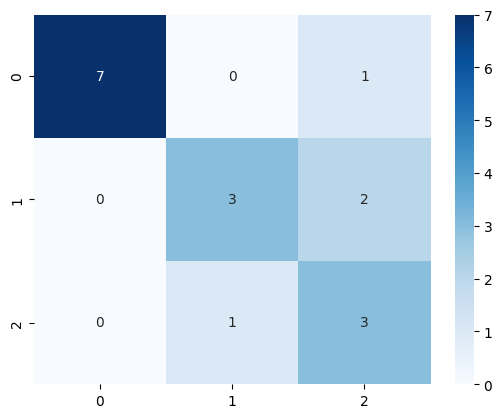

In [ ]:
result_forest = forest.predict(X_test)
exactitud_forest = accuracy_score(y_test,result_forest)
precision_forest = precision_score(y_test,result_forest,average = 'weighted')
f1_forest = f1_score(y_test,result_forest,average = 'weighted')
conf_mat_forest = confusion_matrix(y_test,result_forest)
print('exactitud bosque:{:.2f} %'.format(exactitud_forest*100))
print('precision bosque:{:.2f} %'.format(precision_forest*100))
print('puntaje f1 bosque:{:.2f} %'.format(f1_forest*100))
sns.heatmap(conf_mat_forest, annot = True, cmap='Blues', fmt='d')

In [ ]:
nombre = 'bosque_multiclase.joblib'
joblib.dump(forest, nombre)

['bosque_multiclase.joblib']